# Classify different data sets

### Basic includes

In [1]:
# Using pandas to load the csv file
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from keras import models 
from keras import layers 
from keras import callbacks
from keras.utils import to_categorical

# reuters and fashin mnist data set from keras
from keras.datasets import reuters
from keras.datasets import fashion_mnist

# needed to preprocess text
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


### Classify the Fashion Mnist

---

[9 0 0 ... 3 0 5]
(10000, 28, 28)


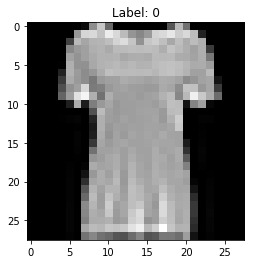

In [2]:
(fashion_train_data, fashion_train_labels), (fashion_test_data, fashion_test_labels) = fashion_mnist.load_data()

print(fashion_train_labels)
print(fashion_test_data.shape)

test_index = 10

plt.title("Label: " + str(fashion_train_labels[test_index]))
plt.imshow(fashion_train_data[test_index], cmap="gray")

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [3]:
train_images1 = fashion_train_data.reshape((60000,28*28))
train_images1 = train_images1.astype('float32') / 255
train_labels1 = to_categorical(fashion_train_labels)

test_images1 = fashion_test_data.reshape((10000,28*28))
test_images1 = test_images1.astype('float32') / 255
test_labels1 = to_categorical(fashion_test_labels)

#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [4]:
num_classes_1 = 10
model = models.Sequential()
model.add(layers.Dense(784, activation='relu', input_shape=(28*28,)))
# Added dropout between the input and first hidden layer
model.add(layers.Dropout(0.3))
######
model.add(layers.Dense(355, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(240, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(num_classes_1, activation='softmax'))
model.summary()

# included the early stopping which monitors the validation loss
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=7)
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop',
              metrics=['categorical_accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 355)               278675    
_________________________________________________________________
dropout_2 (Dropout)          (None, 355)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 240)               85440     
_________________________________________________________________
dropout_3 (Dropout)          (None, 240)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2410      
Total para

In [5]:
history1 = model.fit(train_images1, train_labels1,
          batch_size=512,
          epochs=40,
          validation_split=0.2,
          callbacks=[early_stop], 
          verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
 - 7s - loss: 0.1355 - categorical_accuracy: 0.7005 - val_loss: 0.1183 - val_categorical_accuracy: 0.7298
Epoch 2/40
 - 4s - loss: 0.0928 - categorical_accuracy: 0.8037 - val_loss: 0.0723 - val_categorical_accuracy: 0.8457
Epoch 3/40
 - 4s - loss: 0.0805 - categorical_accuracy: 0.8306 - val_loss: 0.0789 - val_categorical_accuracy: 0.8218
Epoch 4/40
 - 4s - loss: 0.0743 - categorical_accuracy: 0.8429 - val_loss: 0.0679 - val_categorical_accuracy: 0.8623
Epoch 5/40
 - 4s - loss: 0.0694 - categorical_accuracy: 0.8554 - val_loss: 0.0654 - val_categorical_accuracy: 0.8642
Epoch 6/40
 - 4s - loss: 0.0659 - categorical_accuracy: 0.8633 - val_loss: 0.0654 - val_categorical_accuracy: 0.8663
Epoch 7/40
 - 4s - loss: 0.0632 - categorical_accuracy: 0.8694 - val_loss: 0.0666 - val_categorical_accuracy: 0.8668
Epoch 8/40
 - 4s - loss: 0.0609 - categorical_accuracy: 0.8739 - val_loss: 0.0609 - val_categorical_accuracy: 0.8740
Epoch 9/40
 - 

In [6]:
results_1 = model.evaluate(test_images1, test_labels1)

print(results_1)

10000/10000 [==============================] - 1s 119us/step
[0.0652492983341217, 0.8644]


In [7]:
history_dict1 = history1.history
print(history_dict1.keys())

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])


In [8]:
acc_1 = history_dict1['categorical_accuracy']
val_acc_1 = history_dict1['val_categorical_accuracy']
loss_1 = history_dict1['loss']
val_loss_1 = history_dict1['val_loss']

epochs = range(1, len(acc_1) + 1)

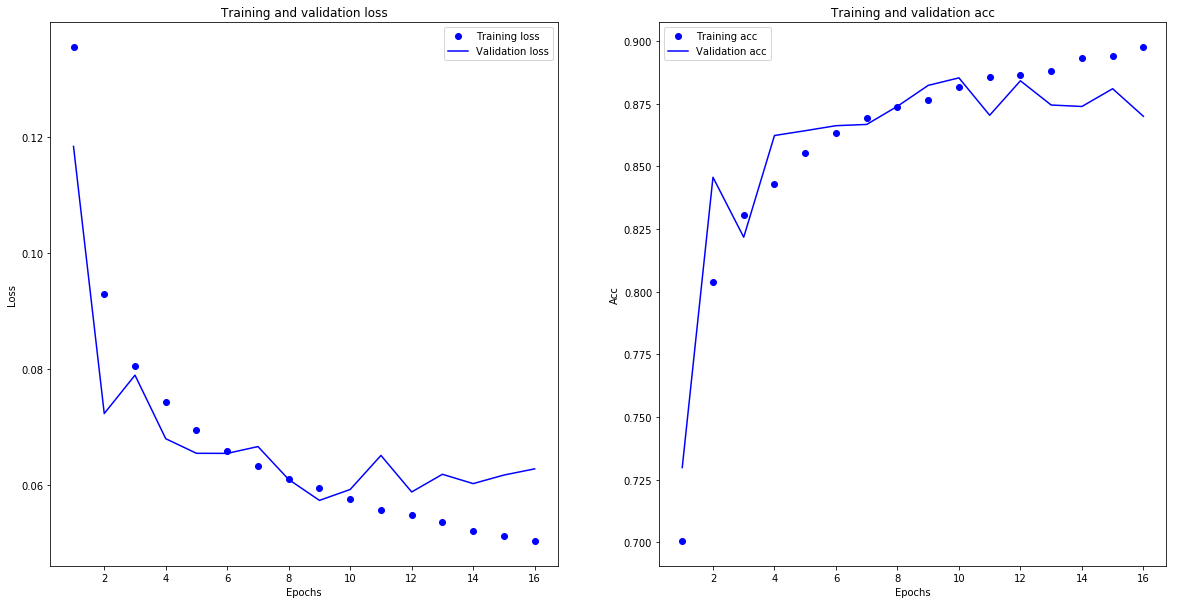

In [9]:
#For plot
# Plot of the validation and training loss
f, (ax1, ax2)=plt.subplots(1,2,figsize=(20,10))
# "bo" is for "blue dot"
ax1.plot(epochs, loss_1, 'bo', label='Training loss')
# b is for "solid blue line"
ax1.plot(epochs, val_loss_1, 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(epochs, acc_1, 'bo', label='Training acc')
# b is for "solid blue line"
ax2.plot(epochs, val_acc_1, 'b', label='Validation acc')
ax2.set_title('Training and validation acc')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Acc')
ax2.legend()
plt.show()

## Classifying newswires

---

Build a network to classify Reuters newswires into 46 different mutually-exclusive topics.

### Load and review the data

In [10]:
(reuters_train_data, reuters_train_labels),(reuters_test_data, reuters_test_labels) = reuters.load_data(num_words=10000)

print(reuters_train_data.shape)
print(reuters_train_labels.shape)
print(reuters_train_data[0])
print(reuters_train_labels[0])

print(set(reuters_train_labels))

(8982,)
(8982,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45}


Load the word index to decode the train data.

In [11]:
word_index = reuters.get_word_index()

reverse_index = dict([(value+3, key) for (key, value) in word_index.items()])

reverse_index[0] = "<PAD>"
reverse_index[1] = "<START>"
reverse_index[2] = "<UNKNOWN>"  # unknown
reverse_index[3] = "<UNUSED>"

decoded_review = ' '.join([reverse_index.get(i,'?') for i in reuters_train_data[0]])

print(decoded_review)

<START> <UNKNOWN> <UNKNOWN> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [12]:
num_classes_model2 = max(reuters_train_labels)+1
tokenizer = Tokenizer(10000)
train_data_token = tokenizer.sequences_to_matrix(reuters_train_data, mode='binary')
test_data_token = tokenizer.sequences_to_matrix(reuters_test_data, mode='binary')
print(train_data_token.shape)
print(test_data_token.shape)

# One-hot encoding the output
one_hot_train_labels = to_categorical(reuters_train_labels,num_classes_model2)
one_hot_test_labels = to_categorical(reuters_test_labels,num_classes_model2)
print(one_hot_train_labels.shape)
print(one_hot_test_labels.shape)

# Creating a validation set with the first 10000 reviews
validation_data = train_data_token[8900:]
validation_labels = one_hot_train_labels[8900:]

print(validation_data.shape)
print(validation_labels.shape)

(8982, 10000)
(2246, 10000)
(8982, 46)
(2246, 46)
(82, 10000)
(82, 46)


#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [14]:
model1 = models.Sequential()
model1.add(layers.Dense(184, activation='relu', input_dim=10000))
model1.add(layers.Dropout(0.6))
model1.add(layers.Dense(92, activation='relu'))
model1.add(layers.Dropout(0.6))
model1.add(layers.Dense(num_classes_model2, activation='softmax'))

model1.summary()
# included the early stopping which monitors the validation loss
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5)
model1.compile(loss='categorical_crossentropy', 
              optimizer='adamax',
              metrics=['categorical_accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 184)               1840184   
_________________________________________________________________
dropout_6 (Dropout)          (None, 184)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 92)                17020     
_________________________________________________________________
dropout_7 (Dropout)          (None, 92)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 46)                4278      
Total params: 1,861,482
Trainable params: 1,861,482
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model1.fit(train_data_token, one_hot_train_labels,
          batch_size=128,
          epochs=50,
          validation_data=(validation_data,validation_labels),
          callbacks=[early_stop], 
          verbose=2)

Train on 8982 samples, validate on 82 samples
Epoch 1/50
 - 4s - loss: 2.3728 - categorical_accuracy: 0.4457 - val_loss: 1.4425 - val_categorical_accuracy: 0.6585
Epoch 2/50
 - 3s - loss: 1.6347 - categorical_accuracy: 0.6111 - val_loss: 1.3063 - val_categorical_accuracy: 0.7073
Epoch 3/50
 - 3s - loss: 1.4341 - categorical_accuracy: 0.6651 - val_loss: 1.2083 - val_categorical_accuracy: 0.7195
Epoch 4/50
 - 3s - loss: 1.3107 - categorical_accuracy: 0.6922 - val_loss: 1.1413 - val_categorical_accuracy: 0.7195
Epoch 5/50
 - 3s - loss: 1.2076 - categorical_accuracy: 0.7150 - val_loss: 1.0869 - val_categorical_accuracy: 0.7439
Epoch 6/50
 - 3s - loss: 1.1510 - categorical_accuracy: 0.7319 - val_loss: 1.0079 - val_categorical_accuracy: 0.7439
Epoch 7/50
 - 3s - loss: 1.0684 - categorical_accuracy: 0.7487 - val_loss: 0.9213 - val_categorical_accuracy: 0.7683
Epoch 8/50
 - 3s - loss: 1.0092 - categorical_accuracy: 0.7596 - val_loss: 0.8622 - val_categorical_accuracy: 0.7683
Epoch 9/50
 - 3s -

In [16]:
results = model1.evaluate(test_data_token, one_hot_test_labels)

print(results)

2246/2246 [==============================] - 1s 262us/step
[1.2435699541018885, 0.8040961709706145]


In [17]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])


In [18]:
acc_2 = history_dict['categorical_accuracy']
val_acc_2 = history_dict['val_categorical_accuracy']
loss_2 = history_dict['loss']
val_loss_2 = history_dict['val_loss']

epochs = range(1, len(acc_2) + 1)

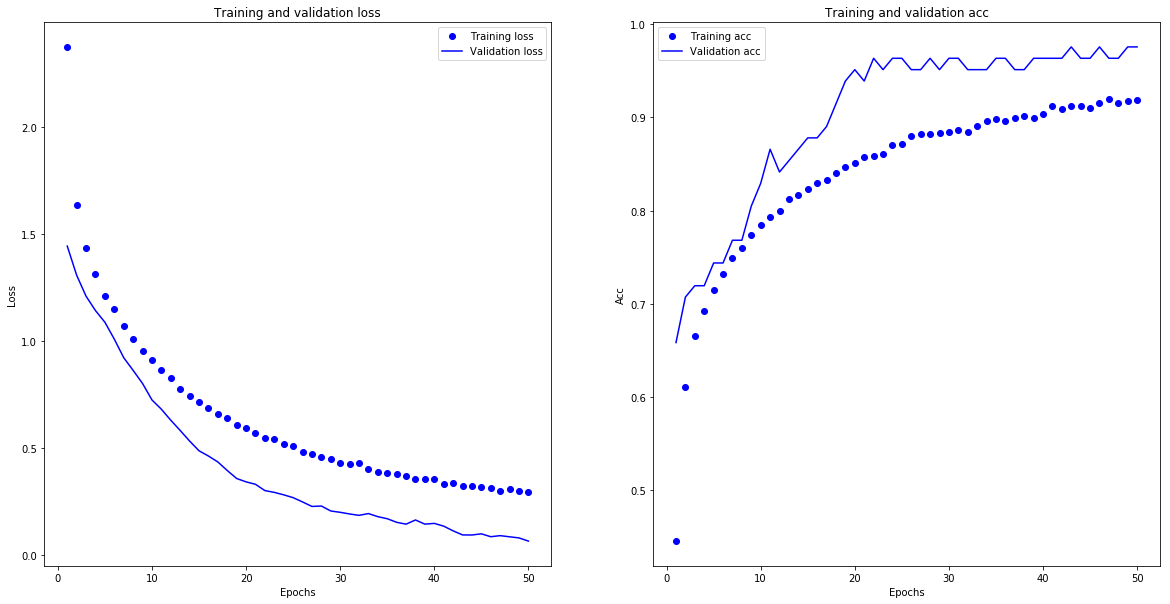

In [19]:
#For plot
# Plot of the validation and training loss
f, (ax1, ax2)=plt.subplots(1,2,figsize=(20,10))
# "bo" is for "blue dot"
ax1.plot(epochs, loss_2, 'bo', label='Training loss')
# b is for "solid blue line"
ax1.plot(epochs, val_loss_2, 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(epochs, acc_2, 'bo', label='Training acc')
# b is for "solid blue line"
ax2.plot(epochs, val_acc_2, 'b', label='Validation acc')
ax2.set_title('Training and validation acc')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Acc')
ax2.legend()
plt.show()

## Predicting Student Admissions

---

Predict student admissions based on three pieces of data:

- GRE Scores
- GPA Scores
- Class rank

### Load and visualize the data

In [33]:
student_data = pd.read_csv("data/student_data.csv")
print(student_data)

     admit    gre   gpa  rank
0        0  380.0  3.61   3.0
1        1  660.0  3.67   3.0
2        1  800.0  4.00   1.0
3        1  640.0  3.19   4.0
4        0  520.0  2.93   4.0
5        1  760.0  3.00   2.0
6        1  560.0  2.98   1.0
7        0  400.0  3.08   2.0
8        1  540.0  3.39   3.0
9        0  700.0  3.92   2.0
10       0  800.0  4.00   4.0
11       0  440.0  3.22   1.0
12       1  760.0  4.00   1.0
13       0  700.0  3.08   2.0
14       1  700.0  4.00   1.0
15       0  480.0  3.44   3.0
16       0  780.0  3.87   4.0
17       0  360.0  2.56   3.0
18       0  800.0  3.75   2.0
19       1  540.0  3.81   1.0
20       0  500.0  3.17   3.0
21       1  660.0  3.63   2.0
22       0  600.0  2.82   4.0
23       0  680.0  3.19   4.0
24       1  760.0  3.35   2.0
25       1  800.0  3.66   1.0
26       1  620.0  3.61   1.0
27       1  520.0  3.74   4.0
28       1  780.0  3.22   2.0
29       0  520.0  3.29   1.0
..     ...    ...   ...   ...
370      1  540.0  3.77   2.0
371      1

Plot of the GRE and the GPA from the data.

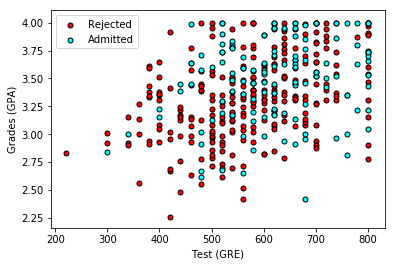

In [21]:
X = np.array(student_data[["gre","gpa"]])
y = np.array(student_data["admit"])
admitted = X[np.argwhere(y==1)]
rejected = X[np.argwhere(y==0)]
plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k',label='Rejected')
plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k', label='Admitted')
plt.xlabel('Test (GRE)')
plt.ylabel('Grades (GPA)')
plt.legend()
plt.show()

Plot of the data by class rank.

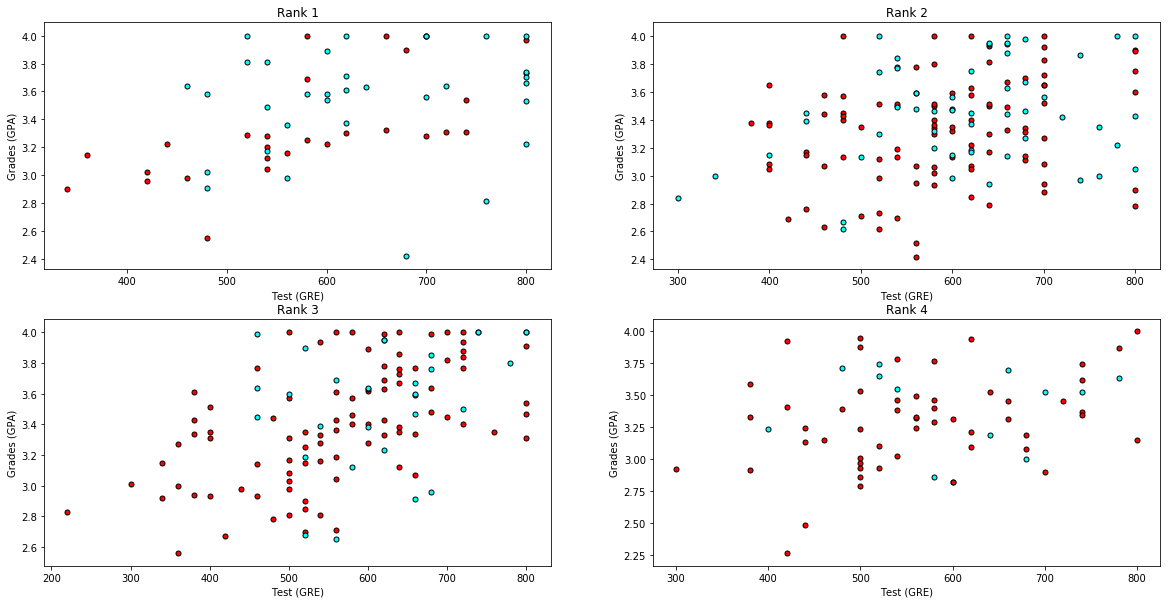

In [22]:
f, plots = plt.subplots(2, 2, figsize=(20,10))
plots = [plot for sublist in plots for plot in sublist]

for idx, plot in enumerate(plots):
    data_rank = student_data[student_data["rank"]==idx+1]
    plot.set_title("Rank " + str(idx+1))
    X = np.array(data_rank[["gre","gpa"]])
    y = np.array(data_rank["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plot.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plot.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plot.set_xlabel('Test (GRE)')
    plot.set_ylabel('Grades (GPA)')
    

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [37]:
maxGRE = max(np.array(student_data["gre"]))
maxGPA = max(np.array(student_data["gpa"]))
num_class_3 = 2

student_data=student_data.fillna(0)

preprocessed_data = pd.concat([student_data,pd.get_dummies(student_data["rank"], prefix='rank')],axis=1)
preprocessed_data = preprocessed_data.drop("rank",axis=1)
processed_data = preprocessed_data[:]
processed_data["gre"] = processed_data["gre"] / maxGRE
processed_data["gpa"] = processed_data["gpa"] / maxGPA
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))

features = train_data.drop('admit', axis=1)
targets = to_categorical(train_data['admit'], num_class_3)
features_test = test_data.drop('admit', axis=1)
targets_test = to_categorical(test_data['admit'],num_class_3)

validation_data = features[:250]
validation_labels = targets[:250]
print(features[:10])
print(targets[:10])

Number of training samples is 360
Number of testing samples is 40
       gre     gpa  rank_0.0  rank_1.0  rank_2.0  rank_3.0  rank_4.0
31   0.950  0.8375         0         0         0         1         0
278  0.850  0.7500         0         0         0         0         1
129  0.575  0.7875         0         0         0         0         1
172  0.850  0.8700         0         0         0         1         0
355  0.950  0.7025         0         1         0         0         0
103  0.675  0.9850         0         0         0         1         0
196  0.825  0.7675         0         0         0         1         0
150  1.000  0.9350         0         1         0         0         0
365  0.600  0.6950         0         0         0         1         0
343  0.725  0.7650         0         0         1         0         0
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [48]:
model2 = models.Sequential()
model2.add(layers.Dense(128,activation='relu', input_shape=(features.shape[1],)))
model2.add(layers.Dropout(0.1))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dropout(0.1))
model2.add(layers.Dense(num_class_3, activation='softmax'))

model2.summary()
# included the early stopping which monitors the validation loss
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=20)
model2.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['categorical_accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 128)               1024      
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 130       
Total params: 9,410
Trainable params: 9,410
Non-trainable params: 0
_________________________________________________________________


In [49]:
history = model2.fit(features, targets,
          batch_size=64,
          epochs=1000,
          validation_data=(validation_data, validation_labels),
          callbacks=[early_stop], 
          verbose=2)

Train on 360 samples, validate on 250 samples
Epoch 1/1000
 - 1s - loss: 0.6782 - categorical_accuracy: 0.5861 - val_loss: 0.6226 - val_categorical_accuracy: 0.7040
Epoch 2/1000
 - 0s - loss: 0.6317 - categorical_accuracy: 0.6806 - val_loss: 0.5986 - val_categorical_accuracy: 0.7040
Epoch 3/1000
 - 0s - loss: 0.6125 - categorical_accuracy: 0.6806 - val_loss: 0.5886 - val_categorical_accuracy: 0.7040
Epoch 4/1000
 - 0s - loss: 0.6093 - categorical_accuracy: 0.6806 - val_loss: 0.5809 - val_categorical_accuracy: 0.7040
Epoch 5/1000
 - 0s - loss: 0.6100 - categorical_accuracy: 0.6833 - val_loss: 0.5758 - val_categorical_accuracy: 0.7040
Epoch 6/1000
 - 0s - loss: 0.6002 - categorical_accuracy: 0.6667 - val_loss: 0.5744 - val_categorical_accuracy: 0.6960
Epoch 7/1000
 - 0s - loss: 0.5968 - categorical_accuracy: 0.6972 - val_loss: 0.5735 - val_categorical_accuracy: 0.7080
Epoch 8/1000
 - 0s - loss: 0.6030 - categorical_accuracy: 0.6944 - val_loss: 0.5699 - val_categorical_accuracy: 0.7080
Ep

Epoch 69/1000
 - 0s - loss: 0.5700 - categorical_accuracy: 0.7000 - val_loss: 0.5531 - val_categorical_accuracy: 0.7160
Epoch 70/1000
 - 0s - loss: 0.5804 - categorical_accuracy: 0.7083 - val_loss: 0.5491 - val_categorical_accuracy: 0.7200
Epoch 71/1000
 - 0s - loss: 0.5735 - categorical_accuracy: 0.6972 - val_loss: 0.5457 - val_categorical_accuracy: 0.7200
Epoch 72/1000
 - 0s - loss: 0.5774 - categorical_accuracy: 0.7000 - val_loss: 0.5471 - val_categorical_accuracy: 0.7240
Epoch 73/1000
 - 0s - loss: 0.5776 - categorical_accuracy: 0.6917 - val_loss: 0.5520 - val_categorical_accuracy: 0.7160
Epoch 74/1000
 - 0s - loss: 0.5756 - categorical_accuracy: 0.7056 - val_loss: 0.5513 - val_categorical_accuracy: 0.7120
Epoch 75/1000
 - 0s - loss: 0.5780 - categorical_accuracy: 0.7028 - val_loss: 0.5460 - val_categorical_accuracy: 0.7240
Epoch 76/1000
 - 0s - loss: 0.5657 - categorical_accuracy: 0.6861 - val_loss: 0.5497 - val_categorical_accuracy: 0.7200
Epoch 77/1000
 - 0s - loss: 0.5693 - cat

Epoch 137/1000
 - 0s - loss: 0.5703 - categorical_accuracy: 0.7000 - val_loss: 0.5450 - val_categorical_accuracy: 0.7280
Epoch 138/1000
 - 0s - loss: 0.5708 - categorical_accuracy: 0.7028 - val_loss: 0.5452 - val_categorical_accuracy: 0.7240
Epoch 139/1000
 - 0s - loss: 0.5666 - categorical_accuracy: 0.7111 - val_loss: 0.5439 - val_categorical_accuracy: 0.7280
Epoch 140/1000
 - 0s - loss: 0.5638 - categorical_accuracy: 0.7139 - val_loss: 0.5473 - val_categorical_accuracy: 0.7200
Epoch 141/1000
 - 0s - loss: 0.5655 - categorical_accuracy: 0.7028 - val_loss: 0.5469 - val_categorical_accuracy: 0.7240
Epoch 142/1000
 - 0s - loss: 0.5661 - categorical_accuracy: 0.7083 - val_loss: 0.5464 - val_categorical_accuracy: 0.7200
Epoch 143/1000
 - 0s - loss: 0.5677 - categorical_accuracy: 0.7000 - val_loss: 0.5469 - val_categorical_accuracy: 0.7240
Epoch 144/1000
 - 0s - loss: 0.5620 - categorical_accuracy: 0.7056 - val_loss: 0.5440 - val_categorical_accuracy: 0.7240
Epoch 145/1000
 - 0s - loss: 0.5

In [50]:
results = model2.evaluate(features_test, targets_test)

print(results)

40/40 [==============================] - 0s 273us/step
[0.6015163898468018, 0.775]


In [51]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])


In [52]:
acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

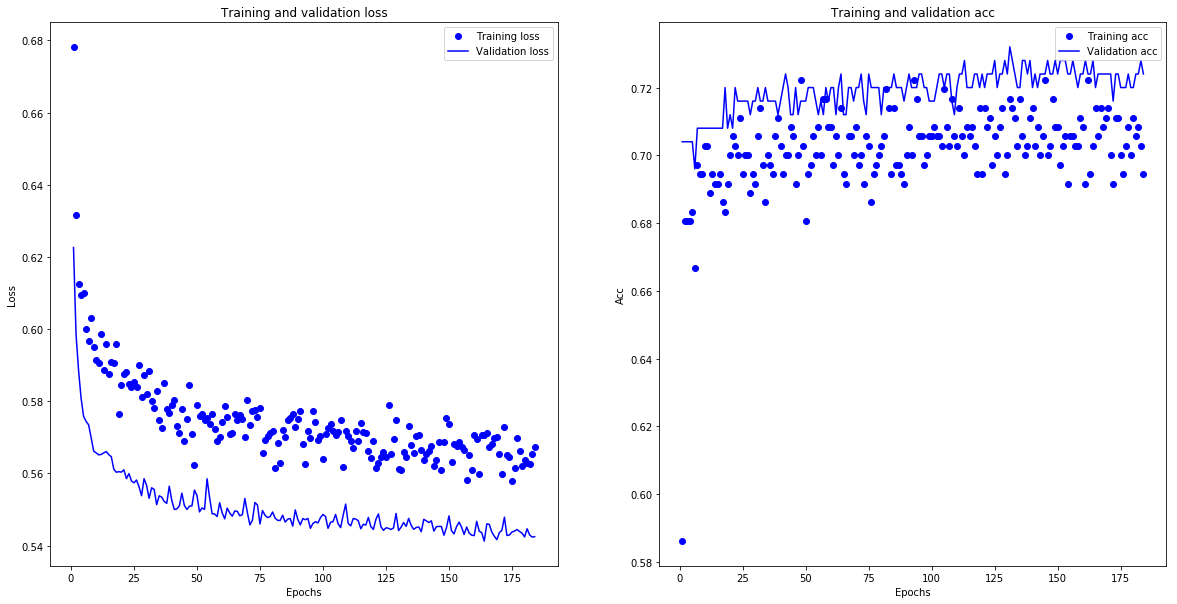

In [53]:
#For plot
# Plot of the validation and training loss
f, (ax1, ax2)=plt.subplots(1,2,figsize=(20,10))
# "bo" is for "blue dot"
ax1.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
ax1.plot(epochs, val_loss, 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(epochs, acc, 'bo', label='Training acc')
# b is for "solid blue line"
ax2.plot(epochs, val_acc, 'b', label='Validation acc')
ax2.set_title('Training and validation acc')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Acc')
ax2.legend()
plt.show()